<center>
     <img src="https://content.sportslogos.net/news/2017/07/New-NBA-Logo-1.png" width='30%'> 
</center>

----------

<h1 align="center"> NBA Data Visualization | Part 1: Data Collection and Preparation <a class="tocSkip"> </h1>  

<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'> Saud Alkoheji & Taz Khan </font></center>
<br>

----------

# Introduction

This notebook is part of 3  sequenced files.  The notebook is created using Jupyter and is used in the initial stages of collecting, engineering, and exploring data to be used in a visualization tool "Tableu". A full presentation is provided with this notebook for the purpose of explaining and demonstrating how the visualization tool works.

The notebook is ordered as follows:

1- Introduction  
2- Resources Used  
3- Imports  
4- API Request (Team & Players Data)  
5- ShotChart DataFrames Creation  
6- Preparing Data  
7- Simple Exploratory Data Analysis  
8- Data Engineering   
9- Selenium (Headshot Images)  


The final visualization court chart is available publicly <a href="https://public.tableau.com/profile/taz.khan#!/vizhome/NBAShotChart_15968023412020/Dashboard?publish=yes">here.</a>

## Resources Used

- nba_api <a href="https://github.com/swar/nba_api ">package</a> from github, maintained by to Swar Patel to request statistics from nba.com 
- Guide on hexbins  <a href="https://www.theinformationlab.co.uk/2015/05/12/hexbins-in-tableau/ ">in tableau</a> by Chris Love
- <a href="https://www.82games.com/locations.htm"> Zone correlation to players'</a>  movement and ball possession
- Video about <a href="https://www.youtube.com/watch?v=yWXD7xi1f30"> Creating an Interactive Shot Map </a>
- Court  <a href="https://datavizardry.com/2020/02/03/nba-shot-charts-part-2/ ">hexbinning</a> setup and dimensions by Daniel Teo
- How Mapping Shots In The NBA Changed It Forever. An article from <a href="https://fivethirtyeight.com/features/how-mapping-shots-in-the-nba-changed-it-forever/">fivethirtyeight</a>   
by Kirk Goldberry; considered by many the leading visualizer of NBA shooting data
- <a href="https://www.instagram.com/kirkgoldsberry/?hl=en">Instagram</a> account of Kirk Goldberry. NBA analyst at ESPN. NYT bestselling author of Sprawlball. 
- <a href="https://campus.datacamp.com/courses/introduction-to-tableau/getting-started-with-tableau?ex=10">DataCamp Introduction to Tableu</a> was used to quickly learn the fundementals needed in Tableu; load data,   
load worksheets, create visualizations and present dashboards.
- Article on <a href="https://analyzeball.com/2019/12/24/clustering-nba-shot-charts-part-2/"> Clustering NBA Shot Charts</a>

# Imports 

In [1]:
# Basic initial libraries
import os
import pandas as pd 
import datetime
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from pandas import DataFrame
from collections import Counter

#NBA  API - client package that gives access to stats on NBA.com
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import teams

# Webscraping tools
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import requests as re
from time import sleep
import random
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import urllib
from bs4 import BeautifulSoup
import bs4
from bs4 import BeautifulSoup


ImportError: cannot import name 'remove_na' from 'pandas.core.series' (C:\Users\tazkh\anaconda3\lib\site-packages\pandas\core\series.py)

# Requests for Player and Team Data

In [43]:
# Checking the directory path - for path, in order to easily find the files
curDir = os.getcwd()
curDir

'C:\\Users\\tazkh\\OneDrive\\Documents\\WeCloudData\\Project'

In [130]:
# Paramters needed for requesting through the API
custom_headers = {
    'Host': 'stats.nba.com',
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [133]:
# Get a dictionary of all 30 teams
teams = teams.get_teams()
teams_df = DataFrame(teams, columns=[
    'id',
    'full_name',
    'abbreviation',
    'nickname',
    'city', 
    'state',
    'year_founded'      
])

#Check the dataframe
teams_df.head(30)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [134]:
# State was wrong for the Atlanta Hawks. Fixed. Everything else looks good. 
teams_df['state'] = teams_df['state'].replace(['Atlanta'], 'Georgia')
teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


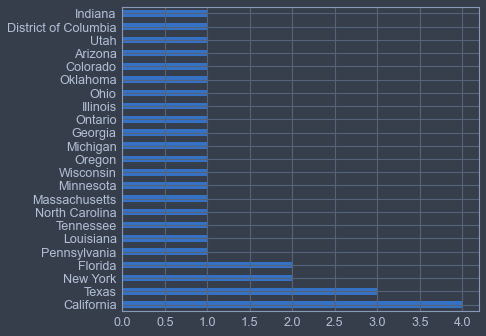

In [135]:
# Quick visual check to make sure loaded data makes sense. Looks accurate. 
teams_df['state'].value_counts().plot(kind='barh')

In [131]:
# Get a list of all players in the NBA including inactive players who played in the past seasons. 
all_players = players.get_players()
players_df = DataFrame(all_players, columns=['id', 'full_name', 'last_name', 'is_active']) 

In [137]:
# Check all players data regardless of whether they are active or have shots data
print(players_df.info(), players_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4501 non-null   int64 
 1   full_name  4501 non-null   object
 2   last_name  4501 non-null   object
 3   is_active  4501 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 110.0+ KB


,id,full_name,last_name,is_active
0,76001,Alaa Abdelnaby,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Abdul-Wahad,False


In [132]:
players_df.to_csv("players.csv", sep=" ", header=True, index=False)  

# Create ShotChart DataFrames

This section will include the coding done to collect data of each season separately from 2000 to 2020.  

Data will be collected in 2 tables for each season. The first table df[x] includes all players data with the used columns in the visualization project.  The second table lg[x] will have an aggregate of the seasons scores and the columns as follows but not in order of importance:

        ______________________________________________________________________________________________________
        |    df[x] Column Name   |       Information      |    lg[x] Column Name    |     Information        |
        ------------------------------------------------------------------------------------------------------
        | 1-  PLAYER_ID          | Unique ID per player   | 1- SHOT_ZONE_BASIC      |  Shot by Zone 1        |
        | 2-  PLAYER_NAME        | Player Name            | 2- SHOT_ZONE_AREA       |  Shot by Zone 2        |
        | 3-  TEAM_NAME          | Team Name              | 3- SHOT_ZONE_RANGE      |  Shot by distance zone |
        | 4-  PERIOD             | Period of the game(1-8)| 4- FGA                  |  Attempted field goals |
        | 5-  MINUTES_REMAINING  | Minutes remaining for  | 5- FGM                  |  Scored field goals    |
        | the game               | 6- FG_PCT              | 6- FG_PCT               | Sum of FGM / sum of FGA|
        | 6-  SECONDS_REMAINING  | Seconds remaining for  |                         |                        |
        |                        | the game               |                         |                        |
        | 7-  SHOT_TYPE          | Shot type by zone      |                         |                        |
        | 8-  SHOT_ZONE_BASIC    | Shot by Zone 1         |                         |                        |
        | 9-  SHOT_ZONE_AREA     | Shot by Zone 2         |                         |                        |
        | 10- SHOT_ZONE_RANGE    | Shot by distance zone  |                         |                        |
        | 11- SHOT_DISTANCE      | Exact shot distance    |                         |                        |
        | 12- LOC_X              | location of shot on X  |                         |                        |
        |                        | axis                   |                         |                        |
        | 13- LOC_Y              | location of shot on X  |                         |                        |
        |                        | axis                   |                         |                        |
        | 14- SHOT_ATTEMPTED_FLAG| Attempted field goals  |                         |                        | 
        | 15- SHOT_MADE_FLAG     | Scored field goals     |                         |                        |  
        | 16- GAME_DATE          | Date of the game       |                         |                        |  
        | 17- HTM                | Code for host team     |                         |                        |  
        | 18- VTM                | Code for visitor team  |                         |                        |
        ______________________________________________________________________________________________________
        ------------------------------------------------------------------------------------------------------


- The data includes one date column that will be converted into date type prior to using it in Tableau. Another column will be created for the season year in order to separate the seasons if needed.

- Both tables will be merged on zone columns and the engineered season column.

## 2019-2020

In [3]:
#2019-2020
#request shooting data from NBA api endpoing ShotChartDetail
raw20 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2019-20',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2019-2020 
df20 = raw20.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df20['Season'] = '2019-2020'

#converting time
df20['GAME_DATE']=pd.to_datetime(df20['GAME_DATE'])

#create league zonal shooting dataframe for 2019-2020
lg20 = raw20.get_data_frames()[1] 

In [139]:
print(lg20.shape)
print(df20.shape)

(20, 7)
(178962, 25)


In [140]:
lg20.info()
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178962 entries, 0 to 178961
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            178962 non-null  object        
 1   GAME_ID              178962 non-null  object        
 2   GAME_EVENT_ID        178962 non-null  int64         
 3   PLAYER_ID       

## 2018-2019

In [4]:
#2018-2019
#request shooting data from NBA api endpoing ShotChartDetail
raw19 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2018-19',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2018-2019 
df19 = raw19.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df19['Season'] = '2018-2019'

#converting time
df19['GAME_DATE']=pd.to_datetime(df19['GAME_DATE'])

#create league zonal shooting dataframe for 2018-2019
lg19 = raw19.get_data_frames()[1] 

In [142]:
print(lg19.shape)
print(df19.shape)
lg19.info()
df19.info()

(20, 7)
(219458, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219458 entries, 0 to 219457
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            219458 non-null  object        
 1   GAME_ID              219458 non-null  object        
 2   GAME_EVENT_ID        219458 non-null  int64         


## 2017-2018


In [143]:
#2017-2018
#request shooting data from NBA api endpoing ShotChartDetail
raw18 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2017-18',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2017-2018
df18 = raw18.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df18['Season'] = '2017-2018'

#converting time
df18['GAME_DATE']=pd.to_datetime(df18['GAME_DATE'])

#create league zonal shooting dataframe for 2017-2018
lg18 = raw18.get_data_frames()[1] 

In [144]:
print(lg18.shape)
print(df18.shape)
lg18.info()
df18.info()

(20, 7)
(211707, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211707 entries, 0 to 211706
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            211707 non-null  object        
 1   GAME_ID              211707 non-null  object        
 2   GAME_EVENT_ID        211707 non-null  int64         


## 2016-2017

In [145]:
#2016-2017
#request shooting data from NBA api endpoing ShotChartDetail
raw17 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2016-17',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2016-2017
df17 = raw17.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df17['Season'] = '2016-2017'

#converting time
df17['GAME_DATE']=pd.to_datetime(df17['GAME_DATE'])

#create league zonal shooting dataframe for 2016-2017
lg17 = raw17.get_data_frames()[1] 

In [146]:
print(lg17.shape)
print(df17.shape)
lg17.info()
df17.info()

(20, 7)
(209929, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209929 entries, 0 to 209928
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            209929 non-null  object        
 1   GAME_ID              209929 non-null  object        
 2   GAME_EVENT_ID        209929 non-null  int64         


## 2015-2016

In [148]:
#2015-2016
#request shooting data from NBA api endpoing ShotChartDetail
raw16 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2015-16',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2015-2016
df16 = raw16.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df16['Season'] = '2015-2016'

#converting time
df16['GAME_DATE']=pd.to_datetime(df16['GAME_DATE'])

#create league zonal shooting dataframe for 2015-2016
lg16 = raw16.get_data_frames()[1] 

In [150]:
print(lg16.shape)
print(df16.shape)
lg16.info()
df16.info()

(20, 7)
(207893, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207893 entries, 0 to 207892
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            207893 non-null  object        
 1   GAME_ID              207893 non-null  object        
 2   GAME_EVENT_ID        207893 non-null  int64         


## 2014-2015

In [151]:
#2014-2015
#request shooting data from NBA api endpoing ShotChartDetail
raw15 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2014-15',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

#create shotchart dataframe for 2014-2015
df15 = raw15.get_data_frames()[0]

#add Season column for future filtering in Visualization 
df15['Season'] = '2014-2015'

#converting time
df15['GAME_DATE']=pd.to_datetime(df15['GAME_DATE'])

#create league zonal shooting dataframe for 2014-2015
lg15 = raw15.get_data_frames()[1] 

In [152]:
print(lg15.shape)
print(df15.shape)
lg15.info()
df15.info()

(20, 7)
(205550, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205550 entries, 0 to 205549
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            205550 non-null  object        
 1   GAME_ID              205550 non-null  object        
 2   GAME_EVENT_ID        205550 non-null  int64         


## 2013-2014

In [153]:
raw14 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2013-14',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df14 = raw14.get_data_frames()[0]
df14['Season'] = '2013-2014'
df14['GAME_DATE']=pd.to_datetime(df14['GAME_DATE'])

lg14 = raw14.get_data_frames()[1] 

print(lg14.shape)
print(df14.shape)
lg14.info()
df14.info()

(20, 7)
(204126, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204126 entries, 0 to 204125
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            204126 non-null  object        
 1   GAME_ID              204126 non-null  object        
 2   GAME_EVENT_ID        204126 non-null  int64         


## 2012-2013

In [154]:
raw13 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2012-13',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df13 = raw13.get_data_frames()[0]
df13['Season'] = '2012-2013'
df13['GAME_DATE']=pd.to_datetime(df13['GAME_DATE'])

lg13 = raw13.get_data_frames()[1] 

print(lg13.shape)
print(df13.shape)
lg13.info()
df13.info()

(20, 7)
(201579, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201579 entries, 0 to 201578
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            201579 non-null  object        
 1   GAME_ID              201579 non-null  object        
 2   GAME_EVENT_ID        201579 non-null  int64         


## 2011-2012

In [155]:
raw12 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2011-12',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df12 = raw12.get_data_frames()[0]
df12['Season'] = '2011-2012'
df12['GAME_DATE']=pd.to_datetime(df12['GAME_DATE'])

lg12 = raw12.get_data_frames()[1] 

print(df12.shape)
print(lg12.shape)
lg12.info()
df12.info()

(161205, 25)
(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        20 non-null     object 
 1   SHOT_ZONE_BASIC  20 non-null     object 
 2   SHOT_ZONE_AREA   20 non-null     object 
 3   SHOT_ZONE_RANGE  20 non-null     object 
 4   FGA              20 non-null     int64  
 5   FGM              20 non-null     int64  
 6   FG_PCT           20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161205 entries, 0 to 161204
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            161205 non-null  object        
 1   GAME_ID              161205 non-null  object        
 2   GAME_EVENT_ID        161205 non-null  int64         


## 2010-2011

In [156]:
raw11 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2010-11',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df11 = raw11.get_data_frames()[0]
df11['Season'] = '2010-2011'
df11['GAME_DATE']=pd.to_datetime(df11['GAME_DATE'])

lg11 = raw11.get_data_frames()[1] 

print(df11.shape)
print(lg11.shape)
df11.info()
lg11.info()

(199761, 25)
(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199761 entries, 0 to 199760
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            199761 non-null  object        
 1   GAME_ID              199761 non-null  object        
 2   GAME_EVENT_ID        199761 non-null  int64         
 3   PLAYER_ID            199761 non-null  int64         
 4   PLAYER_NAME          199761 non-null  object        
 5   TEAM_ID              199761 non-null  int64         
 6   TEAM_NAME            199761 non-null  object        
 7   PERIOD               199761 non-null  int64         
 8   MINUTES_REMAINING    199761 non-null  int64         
 9   SECONDS_REMAINING    199761 non-null  int64         
 10  EVENT_TYPE           199761 non-null  object        
 11  ACTION_TYPE          199761 non-null  object        
 12  SHOT_TYPE            199761 non-null  object       

## 2009-2010

In [157]:
raw10 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2009-10',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df10 = raw10.get_data_frames()[0]
df10['Season'] = '2009-2010'
df10['GAME_DATE']=pd.to_datetime(df10['GAME_DATE'])

lg10 = raw10.get_data_frames()[1] 

print(df10.shape)
print(lg10.shape)
df10.info()
lg10.info()

(200966, 25)
(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200966 entries, 0 to 200965
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            200966 non-null  object        
 1   GAME_ID              200966 non-null  object        
 2   GAME_EVENT_ID        200966 non-null  int64         
 3   PLAYER_ID            200966 non-null  int64         
 4   PLAYER_NAME          200966 non-null  object        
 5   TEAM_ID              200966 non-null  int64         
 6   TEAM_NAME            200966 non-null  object        
 7   PERIOD               200966 non-null  int64         
 8   MINUTES_REMAINING    200966 non-null  int64         
 9   SECONDS_REMAINING    200966 non-null  int64         
 10  EVENT_TYPE           200966 non-null  object        
 11  ACTION_TYPE          200966 non-null  object        
 12  SHOT_TYPE            200966 non-null  object       

## 2008-2009

In [158]:
raw09 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2008-09',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df09 = raw09.get_data_frames()[0]
df09['Season'] = '2008-2009'
df09['GAME_DATE']=pd.to_datetime(df09['GAME_DATE'])

lg09 = raw09.get_data_frames()[1] 

print(df09.shape)
print(lg09.shape)
df09.info()
lg09.info()

(199030, 25)
(20, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199030 entries, 0 to 199029
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            199030 non-null  object        
 1   GAME_ID              199030 non-null  object        
 2   GAME_EVENT_ID        199030 non-null  int64         
 3   PLAYER_ID            199030 non-null  int64         
 4   PLAYER_NAME          199030 non-null  object        
 5   TEAM_ID              199030 non-null  int64         
 6   TEAM_NAME            199030 non-null  object        
 7   PERIOD               199030 non-null  int64         
 8   MINUTES_REMAINING    199030 non-null  int64         
 9   SECONDS_REMAINING    199030 non-null  int64         
 10  EVENT_TYPE           199030 non-null  object        
 11  ACTION_TYPE          199030 non-null  object        
 12  SHOT_TYPE            199030 non-null  object       

## 2007-2008

In [159]:
raw08 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2007-08',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df08 = raw08.get_data_frames()[0]
df08['Season'] = '2007-2008'
df08['GAME_DATE']=pd.to_datetime(df08['GAME_DATE'])

lg08 = raw08.get_data_frames()[1] 

df08.info()
lg08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200501 entries, 0 to 200500
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            200501 non-null  object        
 1   GAME_ID              200501 non-null  object        
 2   GAME_EVENT_ID        200501 non-null  int64         
 3   PLAYER_ID            200501 non-null  int64         
 4   PLAYER_NAME          200501 non-null  object        
 5   TEAM_ID              200501 non-null  int64         
 6   TEAM_NAME            200501 non-null  object        
 7   PERIOD               200501 non-null  int64         
 8   MINUTES_REMAINING    200501 non-null  int64         
 9   SECONDS_REMAINING    200501 non-null  int64         
 10  EVENT_TYPE           200501 non-null  object        
 11  ACTION_TYPE          200501 non-null  object        
 12  SHOT_TYPE            200501 non-null  object        
 13  SHOT_ZONE_BASI

## 2006-2007

In [160]:
raw07 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2006-07',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df07 = raw07.get_data_frames()[0]
df07['Season'] = '2006-2007'
df07['GAME_DATE']=pd.to_datetime(df07['GAME_DATE'])

lg07 = raw07.get_data_frames()[1] 

df07.info()
lg07.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196072 entries, 0 to 196071
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            196072 non-null  object        
 1   GAME_ID              196072 non-null  object        
 2   GAME_EVENT_ID        196072 non-null  int64         
 3   PLAYER_ID            196072 non-null  int64         
 4   PLAYER_NAME          196072 non-null  object        
 5   TEAM_ID              196072 non-null  int64         
 6   TEAM_NAME            196072 non-null  object        
 7   PERIOD               196072 non-null  int64         
 8   MINUTES_REMAINING    196072 non-null  int64         
 9   SECONDS_REMAINING    196072 non-null  int64         
 10  EVENT_TYPE           196072 non-null  object        
 11  ACTION_TYPE          196072 non-null  object        
 12  SHOT_TYPE            196072 non-null  object        
 13  SHOT_ZONE_BASI

## 2005-2006

In [161]:
raw06 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2005-06',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df06 = raw06.get_data_frames()[0]
df06['Season'] = '2005-2006'
df06['GAME_DATE']=pd.to_datetime(df06['GAME_DATE'])

lg06 = raw06.get_data_frames()[1] 

df06.info()
lg06.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194314 entries, 0 to 194313
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            194314 non-null  object        
 1   GAME_ID              194314 non-null  object        
 2   GAME_EVENT_ID        194314 non-null  int64         
 3   PLAYER_ID            194314 non-null  int64         
 4   PLAYER_NAME          194314 non-null  object        
 5   TEAM_ID              194314 non-null  int64         
 6   TEAM_NAME            194314 non-null  object        
 7   PERIOD               194314 non-null  int64         
 8   MINUTES_REMAINING    194314 non-null  int64         
 9   SECONDS_REMAINING    194314 non-null  int64         
 10  EVENT_TYPE           194314 non-null  object        
 11  ACTION_TYPE          194314 non-null  object        
 12  SHOT_TYPE            194314 non-null  object        
 13  SHOT_ZONE_BASI

## 2004-2005

In [162]:
raw05 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2004-05',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df05 = raw05.get_data_frames()[0]
df05['Season'] = '2004-2005'
df05['GAME_DATE']=pd.to_datetime(df05['GAME_DATE'])

lg05 = raw05.get_data_frames()[1] 

df05.info()
lg05.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197626 entries, 0 to 197625
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            197626 non-null  object        
 1   GAME_ID              197626 non-null  object        
 2   GAME_EVENT_ID        197626 non-null  int64         
 3   PLAYER_ID            197626 non-null  int64         
 4   PLAYER_NAME          197626 non-null  object        
 5   TEAM_ID              197626 non-null  int64         
 6   TEAM_NAME            197626 non-null  object        
 7   PERIOD               197626 non-null  int64         
 8   MINUTES_REMAINING    197626 non-null  int64         
 9   SECONDS_REMAINING    197626 non-null  int64         
 10  EVENT_TYPE           197626 non-null  object        
 11  ACTION_TYPE          197626 non-null  object        
 12  SHOT_TYPE            197626 non-null  object        
 13  SHOT_ZONE_BASI

## 2003-2004

In [163]:
raw04 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2003-04',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df04 = raw04.get_data_frames()[0]
df04['Season'] = '2003-2004'
df04['GAME_DATE']=pd.to_datetime(df04['GAME_DATE'])

lg04 = raw04.get_data_frames()[1] 

df04.info()
lg04.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189803 entries, 0 to 189802
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            189803 non-null  object        
 1   GAME_ID              189803 non-null  object        
 2   GAME_EVENT_ID        189803 non-null  int64         
 3   PLAYER_ID            189803 non-null  int64         
 4   PLAYER_NAME          189803 non-null  object        
 5   TEAM_ID              189803 non-null  int64         
 6   TEAM_NAME            189803 non-null  object        
 7   PERIOD               189803 non-null  int64         
 8   MINUTES_REMAINING    189803 non-null  int64         
 9   SECONDS_REMAINING    189803 non-null  int64         
 10  EVENT_TYPE           189803 non-null  object        
 11  ACTION_TYPE          189803 non-null  object        
 12  SHOT_TYPE            189803 non-null  object        
 13  SHOT_ZONE_BASI

## 2002-2003

In [164]:
raw03 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2002-03',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df03 = raw03.get_data_frames()[0]
df03['Season'] = '2002-2003'
df03['GAME_DATE']=pd.to_datetime(df03['GAME_DATE'])

lg03 = raw03.get_data_frames()[1] 

df03.info()
lg03.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192109 entries, 0 to 192108
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            192109 non-null  object        
 1   GAME_ID              192109 non-null  object        
 2   GAME_EVENT_ID        192109 non-null  int64         
 3   PLAYER_ID            192109 non-null  int64         
 4   PLAYER_NAME          192109 non-null  object        
 5   TEAM_ID              192109 non-null  int64         
 6   TEAM_NAME            192109 non-null  object        
 7   PERIOD               192109 non-null  int64         
 8   MINUTES_REMAINING    192109 non-null  int64         
 9   SECONDS_REMAINING    192109 non-null  int64         
 10  EVENT_TYPE           192109 non-null  object        
 11  ACTION_TYPE          192109 non-null  object        
 12  SHOT_TYPE            192109 non-null  object        
 13  SHOT_ZONE_BASI

## 2001-2002

In [165]:
raw02 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2001-02',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df02 = raw02.get_data_frames()[0]
df02['Season'] = '2001-2002'
df02['GAME_DATE']=pd.to_datetime(df02['GAME_DATE'])

lg02 = raw02.get_data_frames()[1] 

df02.info()
lg02.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193251 entries, 0 to 193250
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            193251 non-null  object        
 1   GAME_ID              193251 non-null  object        
 2   GAME_EVENT_ID        193251 non-null  int64         
 3   PLAYER_ID            193251 non-null  int64         
 4   PLAYER_NAME          193251 non-null  object        
 5   TEAM_ID              193251 non-null  int64         
 6   TEAM_NAME            193251 non-null  object        
 7   PERIOD               193251 non-null  int64         
 8   MINUTES_REMAINING    193251 non-null  int64         
 9   SECONDS_REMAINING    193251 non-null  int64         
 10  EVENT_TYPE           193251 non-null  object        
 11  ACTION_TYPE          193251 non-null  object        
 12  SHOT_TYPE            193251 non-null  object        
 13  SHOT_ZONE_BASI

## 2000-2001

In [166]:
raw01 = shotchartdetail.ShotChartDetail(
    context_measure_simple='FGA',
    player_id= 0,
    team_id= 0,
    season_nullable = '2000-01',
    season_type_all_star = 'Regular Season',
    last_n_games='0',
    period='0',
    player_position_nullable= ' ',
    clutch_time_nullable= ' ',
    ahead_behind_nullable = ' ',
    outcome_nullable= ' ')

df01 = raw01.get_data_frames()[0]
df01['Season'] = '2000-2001'
df01['GAME_DATE']=pd.to_datetime(df01['GAME_DATE'])

lg01 = raw01.get_data_frames()[1] 

df01.info()
lg01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191662 entries, 0 to 191661
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GRID_TYPE            191662 non-null  object        
 1   GAME_ID              191662 non-null  object        
 2   GAME_EVENT_ID        191662 non-null  int64         
 3   PLAYER_ID            191662 non-null  int64         
 4   PLAYER_NAME          191662 non-null  object        
 5   TEAM_ID              191662 non-null  int64         
 6   TEAM_NAME            191662 non-null  object        
 7   PERIOD               191662 non-null  int64         
 8   MINUTES_REMAINING    191662 non-null  int64         
 9   SECONDS_REMAINING    191662 non-null  int64         
 10  EVENT_TYPE           191662 non-null  object        
 11  ACTION_TYPE          191662 non-null  object        
 12  SHOT_TYPE            191662 non-null  object        
 13  SHOT_ZONE_BASI

# Prepare DF

After getting all the needed data from the API, in this section, the dataframes will be explored from a macro view and then integrated to the visualization tool.  along the way new data will be engineered and further analysis will be done as needed.

The link to the Tableau project is provided above. Features were selected and used for the successful creation of a shot chart. Visualization technique and chart creation was conducted based on the provided resources referenced above.

In [5]:
# The season column is created for each lg[x] dataframe and then concatenated using pandas concat method.
lg20['Season'] = '2019-2020'
lg19['Season'] = '2018-2019'
lg18['Season'] = '2017-2018' 
lg17['Season'] = '2016-2017'
lg16['Season'] = '2015-2016'
lg15['Season'] = '2014-2015'
lg14['Season'] = '2013-2014'
lg13['Season'] = '2012-2013'
lg12['Season'] = '2011-2012'
lg11['Season'] = '2010-2011'
lg10['Season'] = '2009-2010'
lg09['Season'] = '2008-2009'
lg08['Season'] = '2007-2008'
lg07['Season'] = '2006-2007'
lg06['Season'] = '2005-2006'
lg05['Season'] = '2004-2005'
lg04['Season'] = '2003-2004'
lg03['Season'] = '2002-2003'
lg02['Season'] = '2001-2002'
lg01['Season'] = '2000-2001'


# Creating leagues aggregated dataframe with all seasons' data
#----new dataframe -> lg_df
frameslg = [lg20, lg19, lg18, lg17, lg16, lg15, lg14, lg13, lg12, lg11, lg10, lg09,
          lg08, lg07, lg06, lg05, lg04, lg03, lg02, lg01] 
         
lg_df = pd.concat(frameslg)


# Creating player's dataframe with all seasons' data
#----new dataframe -> df
framesdf = [df20, df19, df18, df17, df16, df15, df14, df13, df12, df11, df10, df09,
          df08, df07, df06, df05, df04, df03, df02, df01] 
         
df = pd.concat(framesdf)

# Simple Exploratory Data Analysis

It is important to explore the data to understand the correlations and results of the dataframes. In this section, a simple data analysis is conducted to make sure that the data can be used

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955504 entries, 0 to 191661
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   GRID_TYPE            object        
 1   GAME_ID              object        
 2   GAME_EVENT_ID        int64         
 3   PLAYER_ID            int64         
 4   PLAYER_NAME          object        
 5   TEAM_ID              int64         
 6   TEAM_NAME            object        
 7   PERIOD               int64         
 8   MINUTES_REMAINING    int64         
 9   SECONDS_REMAINING    int64         
 10  EVENT_TYPE           object        
 11  ACTION_TYPE          object        
 12  SHOT_TYPE            object        
 13  SHOT_ZONE_BASIC      object        
 14  SHOT_ZONE_AREA       object        
 15  SHOT_ZONE_RANGE      object        
 16  SHOT_DISTANCE        int64         
 17  LOC_X                int64         
 18  LOC_Y                int64         
 19  SHOT_ATTEMPTED_FLAG  i

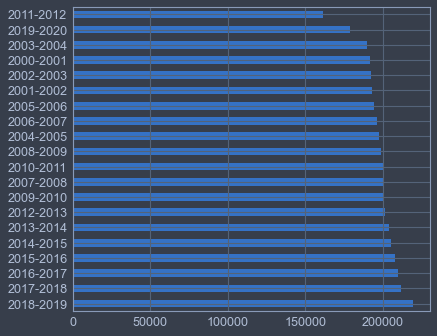

In [170]:
df['Season'].value_counts().plot(kind='barh')
df.info()

Overall number of shots increasing per season. Pace of the game increasing. 

In [194]:
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        400 non-null    object 
 1   SHOT_ZONE_BASIC  400 non-null    object 
 2   SHOT_ZONE_AREA   400 non-null    object 
 3   SHOT_ZONE_RANGE  400 non-null    object 
 4   FGA              400 non-null    int64  
 5   FGM              400 non-null    int64  
 6   FG_PCT           400 non-null    float64
 7   Season           400 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 28.1+ KB


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955504 entries, 0 to 191661
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   GRID_TYPE            object        
 1   GAME_ID              object        
 2   GAME_EVENT_ID        int64         
 3   PLAYER_ID            int64         
 4   PLAYER_NAME          object        
 5   TEAM_ID              int64         
 6   TEAM_NAME            object        
 7   PERIOD               int64         
 8   MINUTES_REMAINING    int64         
 9   SECONDS_REMAINING    int64         
 10  EVENT_TYPE           object        
 11  ACTION_TYPE          object        
 12  SHOT_TYPE            object        
 13  SHOT_ZONE_BASIC      object        
 14  SHOT_ZONE_AREA       object        
 15  SHOT_ZONE_RANGE      object        
 16  SHOT_DISTANCE        int64         
 17  LOC_X                int64         
 18  LOC_Y                int64         
 19  SHOT_ATTEMPTED_FLAG  i

In [178]:
# Exporting dataframes to start the visualization process, trial and error as mentioned in previous section's header

df.to_csv("sc01_20.csv", sep=" ", header=True, index=False)  

lg_df.to_csv("lg01_20.csv", sep=" ", header=True, index=False)  

# Data Engineering

As the data is being used in the visualization tool, new ideas arise and the need for new features arise as well.  For that, new features are being created in order to provide the insights needed in the visualization tool. At the same time, the dataframes are being checked in order to confirm that no errors arise.

Below codes are self explanatory and will not be explained further for this section.

## Create New Feature to filter home and road games

In [68]:
# Import dataframes again in order to start engineering after exploring them with the visualization tool

df = pd.read_csv("C:/Users/tazkh/OneDrive/Documents/WeCloudData/Project/nba_vis/sc01_20.csv", header=0, delim_whitespace=True)
lg = pd.read_csv("C:/Users/tazkh/OneDrive/Documents/WeCloudData/Project/nba_vis/lg01_20.csv", header=0, delim_whitespace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955504 entries, 0 to 3955503
Data columns (total 25 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   GRID_TYPE            object
 1   GAME_ID              int64 
 2   GAME_EVENT_ID        int64 
 3   PLAYER_ID            int64 
 4   PLAYER_NAME          object
 5   TEAM_ID              int64 
 6   TEAM_NAME            object
 7   PERIOD               int64 
 8   MINUTES_REMAINING    int64 
 9   SECONDS_REMAINING    int64 
 10  EVENT_TYPE           object
 11  ACTION_TYPE          object
 12  SHOT_TYPE            object
 13  SHOT_ZONE_BASIC      object
 14  SHOT_ZONE_AREA       object
 15  SHOT_ZONE_RANGE      object
 16  SHOT_DISTANCE        int64 
 17  LOC_X                int64 
 18  LOC_Y                int64 
 19  SHOT_ATTEMPTED_FLAG  int64 
 20  SHOT_MADE_FLAG       int64 
 21  GAME_DATE            object
 22  HTM                  object
 23  VTM                  object
 24  Season               obj

In [71]:
df.TEAM_NAME.unique()

array(['New Orleans Pelicans', 'Toronto Raptors', 'Los Angeles Lakers',
       'LA Clippers', 'Chicago Bulls', 'Charlotte Hornets',
       'Detroit Pistons', 'Indiana Pacers', 'Orlando Magic',
       'Cleveland Cavaliers', 'Minnesota Timberwolves', 'Brooklyn Nets',
       'Miami Heat', 'Memphis Grizzlies', 'Boston Celtics',
       'Philadelphia 76ers', 'Dallas Mavericks', 'Washington Wizards',
       'New York Knicks', 'San Antonio Spurs', 'Utah Jazz',
       'Oklahoma City Thunder', 'Sacramento Kings', 'Phoenix Suns',
       'Portland Trail Blazers', 'Denver Nuggets', 'Atlanta Hawks',
       'Houston Rockets', 'Milwaukee Bucks', 'Golden State Warriors',
       'Los Angeles Clippers', 'Charlotte Bobcats', 'New Orleans Hornets',
       'New Jersey Nets', 'Seattle SuperSonics',
       'New Orleans/Oklahoma City Hornets', 'Vancouver Grizzlies'],
      dtype=object)

In [72]:
df.HTM.unique()

array(['TOR', 'LAC', 'CHA', 'IND', 'ORL', 'BKN', 'MIA', 'PHI', 'DAL',
       'SAS', 'UTA', 'PHX', 'POR', 'DET', 'HOU', 'GSW', 'BOS', 'MEM',
       'NOP', 'OKC', 'DEN', 'SAC', 'LAL', 'MIL', 'ATL', 'NYK', 'CLE',
       'CHI', 'MIN', 'WAS', 'NOH', 'NJN', 'SEA', 'NOK', 'CHH', 'VAN'],
      dtype=object)

In [73]:
df['Team2']=df['TEAM_NAME']

In [74]:
abrv = {'New Orleans Pelicans' : 'NOP', 'Toronto Raptors': 'TOR', 'Los Angeles Lakers': 'LAL',
       'LA Clippers': 'LAC', 'Chicago Bulls': 'CHI', 'Charlotte Hornets': 'CHH',
       'Detroit Pistons': 'DET', 'Indiana Pacers': 'IND' , 'Orlando Magic': 'ORL',
       'Cleveland Cavaliers': 'CLE', 'Minnesota Timberwolves': 'MIN', 'Brooklyn Nets': 'BKN',
       'Miami Heat': 'MIA', 'Memphis Grizzlies': 'MEM', 'Boston Celtics': 'BOS',
       'Philadelphia 76ers': 'PHI', 'Dallas Mavericks': 'DAL', 'Washington Wizards': 'WAS',
       'New York Knicks': 'NYK', 'San Antonio Spurs': 'SAS', 'Utah Jazz': 'UTA',
       'Oklahoma City Thunder': 'OKC', 'Sacramento Kings': 'SAC', 'Phoenix Suns': 'PHX',
       'Portland Trail Blazers': 'POR', 'Denver Nuggets': 'DEN', 'Atlanta Hawks': 'ATL',
       'Houston Rockets': 'HOU', 'Milwaukee Bucks': 'MIL', 'Golden State Warriors': 'GSW',
       'Los Angeles Clippers': 'LAC', 'Charlotte Bobcats': 'CHA', 'New Orleans Hornets': 'NOH',
       'New Jersey Nets': 'NJN', 'Seattle SuperSonics': 'SEA',
       'New Orleans/Oklahoma City Hornets': 'NOK' , 'Vancouver Grizzlies': 'VAN'}

df = df.replace({'Team2': abrv}) 

In [75]:
df['Home vs. Away'] = df['HTM'] == df['Team2']

In [76]:
ha = {False: 'Away', True: 'Home'} 
df = df.replace({'Home vs. Away': ha }) 

In [77]:
#making sure everything classified as home or away
df['Home vs. Away'].unique()
df['Home vs. Away'].value_counts()
df['Team2'].unique()

array(['NOP', 'TOR', 'LAL', 'LAC', 'CHI', 'CHH', 'DET', 'IND', 'ORL',
       'CLE', 'MIN', 'BKN', 'MIA', 'MEM', 'BOS', 'PHI', 'DAL', 'WAS',
       'NYK', 'SAS', 'UTA', 'OKC', 'SAC', 'PHX', 'POR', 'DEN', 'ATL',
       'HOU', 'MIL', 'GSW', 'CHA', 'NOH', 'NJN', 'SEA', 'NOK', 'VAN'],
      dtype=object)

In [78]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season,Team2,Home vs. Away
0,Shot Chart Detail,21900001,7,1628366,Lonzo Ball,1610612740,New Orleans Pelicans,1,11,48,...,2,114,1,0,2019-10-22,TOR,NOP,2019-2020,NOP,Away
1,Shot Chart Detail,21900001,9,202324,Derrick Favors,1610612740,New Orleans Pelicans,1,11,47,...,0,-6,1,1,2019-10-22,TOR,NOP,2019-2020,NOP,Away
2,Shot Chart Detail,21900001,10,1628384,OG Anunoby,1610612761,Toronto Raptors,1,11,29,...,15,28,1,0,2019-10-22,TOR,NOP,2019-2020,TOR,Home
3,Shot Chart Detail,21900001,12,201950,Jrue Holiday,1610612740,New Orleans Pelicans,1,11,16,...,81,-1,1,0,2019-10-22,TOR,NOP,2019-2020,NOP,Away
4,Shot Chart Detail,21900001,14,200768,Kyle Lowry,1610612761,Toronto Raptors,1,11,11,...,178,176,1,0,2019-10-22,TOR,NOP,2019-2020,TOR,Home


In [45]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Season,Team2,Home vs. Away
0,Shot Chart Detail,21900001,7,1628366,Lonzo Ball,1610612740,New Orleans Pelicans,1,11,48,...,2,114,1,0,2019-10-22,TOR,NOP,2019-2020,NOP,Away
1,Shot Chart Detail,21900001,9,202324,Derrick Favors,1610612740,New Orleans Pelicans,1,11,47,...,0,-6,1,1,2019-10-22,TOR,NOP,2019-2020,NOP,Away
2,Shot Chart Detail,21900001,10,1628384,OG Anunoby,1610612761,Toronto Raptors,1,11,29,...,15,28,1,0,2019-10-22,TOR,NOP,2019-2020,TOR,Home
3,Shot Chart Detail,21900001,12,201950,Jrue Holiday,1610612740,New Orleans Pelicans,1,11,16,...,81,-1,1,0,2019-10-22,TOR,NOP,2019-2020,NOP,Away
4,Shot Chart Detail,21900001,14,200768,Kyle Lowry,1610612761,Toronto Raptors,1,11,11,...,178,176,1,0,2019-10-22,TOR,NOP,2019-2020,TOR,Home


In [53]:
print(df['SHOT_ZONE_BASIC'].unique())

['In The Paint (Non-RA)' 'Restricted Area' 'Mid-Range' 'Above the Break 3'
 'Left Corner 3' 'Right Corner 3' 'Backcourt']


In [81]:
lg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRID_TYPE        400 non-null    object 
 1   SHOT_ZONE_BASIC  400 non-null    object 
 2   SHOT_ZONE_AREA   400 non-null    object 
 3   SHOT_ZONE_RANGE  400 non-null    object 
 4   FGA              400 non-null    int64  
 5   FGM              400 non-null    int64  
 6   FG_PCT           400 non-null    float64
 7   Season           400 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.1+ KB


## BIG MERGE

In this sub-section the final dataframe is created by merging the entire dataframe sets created in the previuos sections.  The merge is needed in order to calculate the performance of each player in comparison to the whole leagues indicators such as the percentage of scored field goals from the total shots attempted compared to the average of the entire league.

In [122]:
data= df.merge(lg, on=['SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE','Season'],how='outer')  

In [126]:
print(df.shape)
print(data.shape) 

(3955504, 27)
(3955504, 31)


In [127]:
data.to_csv("data.csv", sep=" ", header=True, index=False) 

# Using Selenium To Extract Headshot Images

Finding headshots for a huge number of players is not an easy task as manually saving each headshot is time consuming and can be avoided using new technologies. unfortunately ready datasets could only be found in bulk for a high fee. For this reason, it was decided that web scraping techniques will be used.

In the following section the extraction of images is represented using Selenium, BeautifulSoup, and other local built-in methods.  The data to be captured are name and image url.  However, the page had some issues and some names were not appending the their correct last names.  To avoid that, player_id was used as it is already avalable and linked to player name in the above dataframe.  The player_id was used and linked through Microsoft Excel in order to save time, as this was done close to the submission day.

The final data were used to download each player's image and named after the player's name to easily access the photos in the saved folder.  the images were then integrated to Tableau as shapes and tested.  Using player's images to filter the dashboard was done. However, due to time limitation the experiment soon ended and instead put into future plans. For now, the code is written below with explanation for the steps.

A photo of the resulted filter with the court chart was captured from Tableau and posted in the presentation attached with this notebook.

In [ ]:
# Open main page for Selenium to start fetching the data

driver = webdriver.Chrome('C:\\Users\\samad\\Documents\\Courses\\Data Science Emmersive WCD\Python\\chromedriver_win32\\chromedriver.exe')

# access the website start page

driver.get("https://ca.global.nba.com/playerindex/?_ga=2.155958841.385712374.1596736877-560262929.1596645498")



# Set the contents lists, which will include contents of all scraped pages

content=[]
i=2
for i in range(1,27):
    #wait few seconds to start extracting
    sleep(random.uniform(1.9, 3.2))
    
    # extract data and save it to content lists
    content.append(bs4.BeautifulSoup(driver.page_source,'lxml'))
    
    # find and click on the next page for the next alphabatecal letter
    
    next=driver.find_element_by_xpath(f'/html/body/div[2]/div[2]/div[2]/div/div[2]/div[2]/section/div/div/div/div/div[3]/div[2]/div[2]/div[{i}]')
    next.click()
    i+=1
    


# Create the columns for the images dataframe
players_img = {'url':[],
              'player_id':[]}

# Find all players' images in all pages

for i in range(len(content)):
    imgs= content[i].find_all('img', class_="player-img",attrs= 'src')

    # split the image url and player_id number and add them to players_img table
    
    for tag in imgs:
        players_img['url'].append(str(str(tag.get_text).split()[7].strip('src="')).strip('"/>>'))
        players_img['player_id'].append(str(str(str(tag.get_text).split()[7].strip('src="')).strip('"/>>').split('/')[-1]).split('.')[0])

# Convert the dictionary into a dataframe using pandas

players_img = pd.DataFrame(players_img)

# Add the http in order to access the url and connect to the web without errors

players_img['url']=  'http://' + players_img['url'].astype('str')


# Check for null values
players_img.isnull().sum() 
#--- no null values were found---#


# Drop duplicates

players_img.drop_duplicates(subset='player_id', keep='first', inplace=True)
# The data had a lot of duplicate images and player ids

# Reset the index after dropping the columns to avoid missing index values and to make the table cleaner
players_img.reset_index(inplace=True,drop=True)

# Check the new shape of images data
players_img.shape

# Have a look at the new dataframe
players_img.head()

In [ ]:
# Export the data to find the names comparing to the previous dataframe
players_img.to_excel('players_images.xls')

## Importing necessary modules to save the images and use them in Tableau
import requests # to get image from the web

## Set up the image URL and filename
for i in (range(0,players_img.shape[0])):
    image_url = players_img['url'][i]
    filename =  str(players_img['player_id'][i])+'.png'

# Open the url image, set stream to True, this will return the stream content.
    r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
    if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
        file = open(filename, mode="wb")
        file.write(r.content)
        file.close()

        
        print('Image sucessfully Downloaded: ',filename)
    else:
        print('Image Couldn\'t be retreived')